https://wikidocs.net/61046

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt # 시각화를 위한 맷플롯립
from sklearn.datasets import load_digits
import torch
import torch.nn as nn
from torch import optim

In [4]:
digits = load_digits() # 1,979개의 이미지 데이터 로드

In [11]:
print('전체 샘플의 수 : {}'.format(len(digits.images)))

전체 샘플의 수 : 1797


In [28]:
print(digits.images[0].shape)
print(digits.images[0])

(8, 8)
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


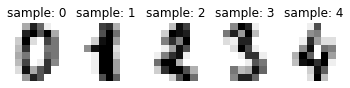

In [25]:
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:5]): # 5개의 샘플만 출력
    plt.subplot(2, 5, index + 1) # Figure를 mxn 그리드로 나누고, p로 지정된 위치에 좌표축을 만듬(행*열*위치)
    plt.axis('off') # x,y 축 설정
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('sample: %i' % label)

In [30]:
model = nn.Sequential(
    nn.Linear(64, 32), # input_layer = 64, hidden_layer1 = 32
    nn.ReLU(),
    nn.Linear(32, 16), # hidden_layer2 = 32, hidden_layer3 = 16
    nn.ReLU(),
    nn.Linear(16, 10) # hidden_layer3 = 16, output_layer = 10
)

In [31]:
X = digits.data # 이미지. 즉, 특성 행렬
Y = digits.target # 각 이미지에 대한 레이블
X = torch.tensor(X, dtype=torch.float32)
Y = torch.tensor(Y, dtype=torch.int64)

In [34]:
loss_fn = nn.CrossEntropyLoss() # 이 비용 함수는 소프트맥스 함수를 포함하고 있음.
optimizer = optim.Adam(model.parameters())
losses = []

In [35]:
for epoch in range(100):
    optimizer.zero_grad()
    y_pred = model(X) # forwar 연산
    loss = loss_fn(y_pred, Y)
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(epoch, 100, loss.item()))

    losses.append(loss.item())

Epoch    0/100 Cost: 2.438031
Epoch   10/100 Cost: 2.088716
Epoch   20/100 Cost: 1.748467
Epoch   30/100 Cost: 1.394533
Epoch   40/100 Cost: 1.041109
Epoch   50/100 Cost: 0.709773
Epoch   60/100 Cost: 0.501614
Epoch   70/100 Cost: 0.374487
Epoch   80/100 Cost: 0.292010
Epoch   90/100 Cost: 0.234234


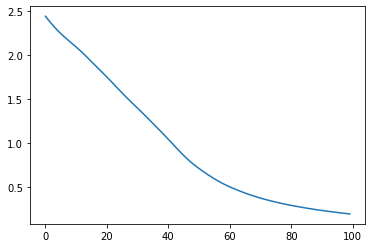

In [36]:
plt.plot(losses)